In [137]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision, cv2
from torchvision import datasets, models, transforms
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import numpy as np
import time, os, math, glob, random
from parameter import *
from model import *

from PIL import Image

In [161]:
device = torch.device("cpu")
print(device)

net = Net_simple(CHANNEL)
net.to(device)

PATH = './ckpt.pth'
checkpoint = torch.load(PATH, map_location ='cpu')
checkpoint_new = {}
for k in checkpoint.keys():
    if not('total_ops' in k or 'total_params' in k):
        checkpoint_new[k] = checkpoint[k]
        
net.load_state_dict(checkpoint_new)

cpu


<All keys matched successfully>

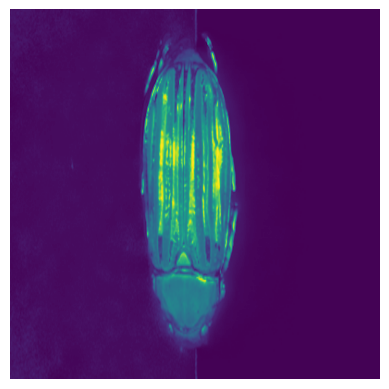

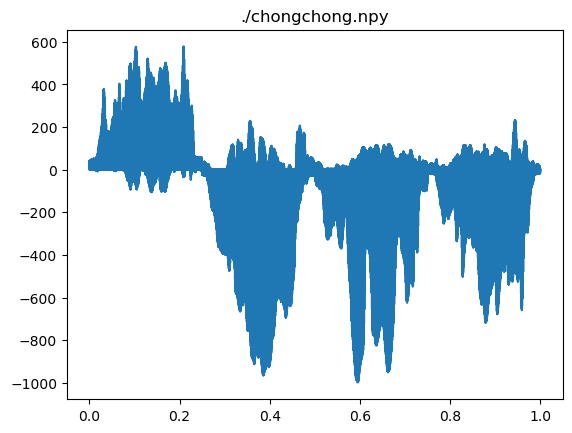

In [240]:

#npy_list = ['./Left.npy', './Chong.npy', './Right.npy']

npy_list = ['./chongchong.npy']

for npy in npy_list:
    coded_map = np.load(npy)
    
    if len(coded_map.shape) == 3:
        coded_map = coded_map[:, :, 0]
    coded_map = np.array(Image.fromarray(coded_map).resize((400, 400)))
    coded_map_show = coded_map*1.0
    coded_map_show = coded_map_show[::-1]
    
    plt.figure()
    plt.imshow(coded_map_show)
    plt.savefig("/Users/pc/Desktop/polarization/dataset/" + npy[2:-4] + '_polarized.png')
    plt.axis('off')

    mueller = np.load('./mueller.npy')
    mask_patch = mueller.transpose(2, 0, 1)
    coded_map_new = coded_map.reshape(1, 400, 400)
    input_patch = np.concatenate([coded_map_new, mask_patch], 0)

    size = input_patch.shape
    input_patch_tensor = torch.tensor(np.reshape(input_patch,(1, size[0], size[1], size[2])))
    input_patch_tensor = input_patch_tensor.float().to(device)

    output = net(input_patch_tensor)
    output = output.cpu().detach().numpy()[0]

    output_size = np.size(output)
    x = np.linspace(0, 1, output_size)
    material = np.reshape(output, (1, output_size))[0]
    plt.figure()
    plt.plot(x, material)
    plt.title(npy)
    plt.show()

In [ ]:
"""coded_map = np.load('./chongchong.npy')

if len(coded_map.shape) == 3:
    coded_map = coded_map[:, :, 0]
coded_map = np.array(Image.fromarray(coded_map).resize((400, 400)))
coded_map_show = coded_map*1.0
coded_map_show = coded_map_show[::-1]

mueller = np.load('./mueller.npy')
mask_patch = mueller.transpose(2, 0, 1)
coded_map_new = coded_map.reshape(1, 400, 400)
input_patch = np.concatenate([coded_map_new, mask_patch], 0)

size = input_patch.shape
input_patch_tensor = torch.tensor(np.reshape(input_patch,(1, size[0], size[1], size[2])))
input_patch_tensor = input_patch_tensor.float().to(device)

output = net(input_patch_tensor)
output = output.cpu().detach().numpy()[0]

# Left material
left_output = output[:, :, 0:50]
left_size = np.size(left_output)
x = np.linspace(0, 1, left_size)
left_material = np.reshape(Left_output, (1, left_size))[0]
plt.plot(x, left_material)
plt.show()

# chongchong
mid_output = output[:, :, 175:225]
mid_size = np.size(mid_output)
x = np.linspace(0, 1, mid_size)
mid_material = np.reshape(mid_output, (1, mid_size))[0]
plt.plot(x, mid_material)
plt.show()

# Right material
right_output = output[:, :, 350:400]
right_size = np.size(right_output)
x = np.linspace(0, 1, right_size)
right_material = np.reshape(right_output, (1, right_size))[0]
plt.plot(x, right_material)
plt.show()

x = np.linspace(0, 1, left_size + mid_size + right_size)
left_zeros = np.zeros_like(x)
left_zeros[0: np.size(left_material)] = left_material
plt.plot(x, left_zeros)

mid_zeros = np.zeros_like(x)
mid_zeros[np.size(mid_material): 2 * np.size(mid_material)] = mid_material
plt.plot(x, mid_zeros)

right_zeros = np.zeros_like(x)
right_zeros[- np.size(right_material):] = right_material
plt.plot(x, right_zeros)
plt.show()"""